 # Resumo sobre Regressão Linear e Classificação
 
 ## Regressão Linear
 A Regressão linear é basicamente uma reta que serve para que consigamos estimar valor. Como, por exemplo, preço de casas baseadas em alguns atributos.

### Primeiro vamos utilizar a regressão linear com a biblioteca sklearn 


In [1]:
import numpy as np                                   # pip install numpy
import matplotlib.pyplot as plt                      # pip install matplotlib
from sklearn.linear_model import LinearRegression    # pip install sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error # para obter métricas do modelo

In [2]:
# Atributos para usarmos para realizar a regressão
idades = np.array([[18], [23], [28], [33], [38], [43], [48], [53], [58], [63]])
custo_plano = np.array([[871], [1132], [1042], [1356], [1488], [1638], [1569], [1754], [1866], [1900]])

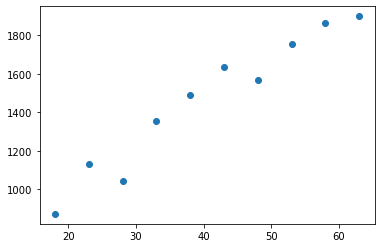

In [3]:
%matplotlib inline
plt.scatter(idades, custo_plano)

In [4]:
# Aplicando a regressão logística
regressor = LinearRegression()
regressor.fit(idades, custo_plano) # treina o modelo


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
# Acessando os coeficientes do modelo
print(regressor.intercept_) # independente
print(regressor.coef_)      # Dependentes

[541.24363636]
[[22.72484848]]


In [6]:
# prevendo o custo do plano de uma pessoa de 40 anos
print(np.reshape(40, (-1,1))) # Se formos passar apenas um valor, temos que passar neste formato
previsao_de_um = regressor.predict(np.reshape(40, (-1,1)))
print(previsao_de_um) 

[[40]]
[[1450.23757576]]


In [7]:
# prevendo o custo de vida para várias idades
previsoes = regressor.predict(idades)
print(previsoes)

[[ 950.29090909]
 [1063.91515152]
 [1177.53939394]
 [1291.16363636]
 [1404.78787879]
 [1518.41212121]
 [1632.03636364]
 [1745.66060606]
 [1859.28484848]
 [1972.90909091]]


In [8]:
# Analisando os erros absolutos e os erros ao quadrado
mae = mean_absolute_error(custo_plano, previsoes)
mse = mean_squared_error(custo_plano, previsoes)

print("Erro absoluto médio", mae)
print("Erro ao quadrado médio", mse)

Erro absoluto médio 70.15515151515156
Erro ao quadrado médio 6412.675151515154


Agora vamos plotar os valores reais e os valores que o modelo previu.


Text(0, 0.5, 'Custo do plano')

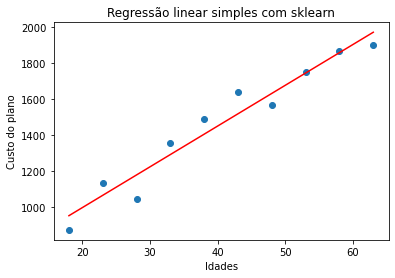

In [9]:
plt.plot(idades, custo_plano, 'o') # 'o' plota o gráfico com pontos
plt.plot(idades, previsoes, color="red") # plota uma reta vermelha
plt.title("Regressão linear simples com sklearn")
plt.xlabel("Idades")
plt.ylabel("Custo do plano")

### Agora vamos utilizar a regressão linear com a biblioteca tensorflow 


Ao utilizarmos o tensorflow, precisamos escalar os dados. Ou seja, deixar a idade e o custo na mesma escala, pois um é idade e o outro é dinheiro.


In [22]:
from sklearn.preprocessing import StandardScaler # para escalonar os dados
import tensorflow as tf

C:\Users\Natielle\anaconda3\envs\tensorflow2_py37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Natielle\anaconda3\envs\tensorflow2_py37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Natielle\anaconda3\envs\tensorflow2_py37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Natielle\anaconda3\env

In [14]:
# Escalonando as idades
scaler_idades = StandardScaler()
idades_escaladas = scaler_idades.fit_transform(idades)
print("Idades sem o escalonamento: \n", idades)
print("Idades COM o escalonamento: \n", idades_escaladas)

Idades sem o escalonamento: 
 [[18]
 [23]
 [28]
 [33]
 [38]
 [43]
 [48]
 [53]
 [58]
 [63]]
Idades COM o escalonamento: 
 [[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [15]:
# Escalonando o custo do plano
scaler_custo_plano = StandardScaler()
custo_plano_escaladas = scaler_custo_plano.fit_transform(custo_plano)
print("Custo do plano sem o escalonamento: \n", custo_plano)
print("Custo do plano COM o escalonamento: \n", custo_plano_escaladas)

Custo do plano sem o escalonamento: 
 [[ 871]
 [1132]
 [1042]
 [1356]
 [1488]
 [1638]
 [1569]
 [1754]
 [1866]
 [1900]]
Custo do plano COM o escalonamento: 
 [[-1.75751985]
 [-0.98083058]
 [-1.24865447]
 [-0.31424669]
 [ 0.07856167]
 [ 0.52493481]
 [ 0.31960317]
 [ 0.87013004]
 [ 1.20342199]
 [ 1.3045999 ]]


Quando plotarmos os dados escalonados poderemos ver que a distribuição não muda. O que muda é apenas a escala dos dados.

Text(0.5, 1.0, 'Atributos escalados')

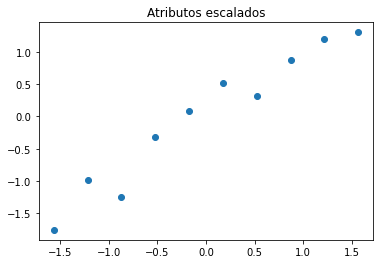

In [17]:
%matplotlib inline
plt.scatter(idades_escaladas, custo_plano_escaladas)
plt.title("Atributos escalados")

Agora vamos utilizar o tensorflow, e para isso temos que saber que a fórmula da regressão linear simples é:

y = b0 + b1*x1

In [19]:
# Primeiro vamos chutar valor para b0 e b1
np.random.seed(0) # permite reprodução do mesmo número aleatório
np.random.rand(2) # dois números aleatórios

array([0.5488135 , 0.71518937])

In [25]:
# Então iremos utilizar variáveis do tensorflow, pois a ideia é que otimizemos os parâmetros b0 e b1 
# Logo, eles vão ficar sendo atualizados
b0 = tf.Variable(0.54)
b1 = tf.Variable(0.71)

print(b0)
print(b1)

<tf.Variable 'Variable_4:0' shape=() dtype=float32_ref>
<tf.Variable 'Variable_5:0' shape=() dtype=float32_ref>


In [26]:
# Para ver o erro, fazemos:
previsoes_com_formula = b0 + b1 * idades_escaladas # previsão
erro = tf.losses.mean_squared_error(custo_plano_escaladas, previsoes_com_formula) # comparando o real com o previsto

Instructions for updating:
Use tf.cast instead.


In [29]:
# Para otimizarmos o erro, ou seja, minimizarmos nós utlizamos a descida do gradiente. 
# Mesmo havendo outras formas de otimizações, para a regressão vamos utilizar a descida do gradiente. 
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)

# Então minimizamos o erro
treinamento = otimizador.minimize(erro)

In [31]:
# Agora vamos executar de fato para encontrar os valores de b0 e b1
init = tf.global_variables_initializer() # inicializa as variáveis

with tf.Session() as sess:
    sess.run(init) # inicialmente b0 e b1 valem 0.54 e 0.71, respectivamente.
    
    for i in range(1000):
        sess.run(treinamento)
    b0_final, b1_final = sess.run([b0, b1])

In [32]:
print("b0 otimizado: ", b0_final)
print("b1 otimizado: ", b1_final)

b0 otimizado:  0.07293497
b1 otimizado:  0.9359134


In [50]:
previsoes_escalonadas = b0_final + b1_final * idades_escaladas
print(previsoes_escalonadas)
type(previsoes_escalonadas)

[[-1.3933595 ]
 [-1.06751629]
 [-0.74167307]
 [-0.41582985]
 [-0.08998664]
 [ 0.23585658]
 [ 0.56169979]
 [ 0.88754301]
 [ 1.21338623]
 [ 1.53922944]]


numpy.ndarray

Text(0.5, 1.0, 'Regressão linear simples com tensorflow')

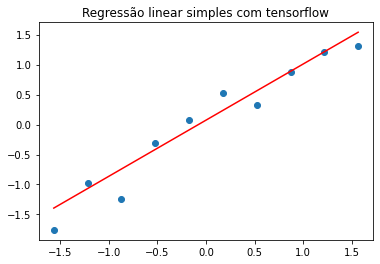

In [51]:
# Comparando os reais com as previsões
plt.plot(idades_escaladas, custo_plano_escaladas, 'o')
plt.plot(idades_escaladas, previsoes_escalonadas, color = 'red')
plt.title("Regressão linear simples com tensorflow")

In [55]:
# Observando as previsões sem estarem normalizadas
previsoes_finais = scaler_custo_plano.inverse_transform(previsoes_escalonadas)
print(previsoes_finais)

[[ 993.37307127]
 [1102.86998723]
 [1212.3669032 ]
 [1321.86381917]
 [1431.36073513]
 [1540.8576511 ]
 [1650.35456707]
 [1759.85148303]
 [1869.348399  ]
 [1978.84531497]]


Para realizarmos a previsão de uma pessoa específica temos que normalizar o valor da idade antes de passar como parâmetro para o modelo da regressão linear. E temos que desnormalizar o resultado da previsão para que a gente saiba o custo de vida. 



In [52]:
# Escalando a idade
uma_idade_escalada = scaler_idades.transform(np.reshape(40, (-1,1)))
uma_idade_escalada

array([[-0.03481553]])

In [53]:
# Realizando a previsão apenas para uma pessoa e já desnormalizando (desescalonando)
previsao_para_um = scaler_custo_plano.inverse_transform(b0_final + b1_final * uma_idade_escalada)
print(previsao_para_um)

[[1475.15950152]]


Para observarmos os erros, fazemos:

In [57]:
mae_com_tensor = mean_absolute_error(custo_plano, previsoes_finais)
mse_com_tensor = mean_squared_error(custo_plano, previsoes_finais)

print("Erro absoluto médio", mae_com_tensor)
print("Erro ao quadrado médio", mse_com_tensor)

Erro absoluto médio 67.91875458994167
Erro ao quadrado médio 7153.9129941765395


O Erro absoluto médio pode ser bom para realizar a análise dos dados. Ex: Em média, a previsão acerta 67 (mae) pra cima ou pra baixo do custo do plano.

Enquanto que o Erro ao quadrado médio pode ser mais utilizado para penalizar o algoritmo quando estiver com erros maiores.